# Boosting
* Versatile: Suitable for both classification and regression, making it flexible for various problem types.
* Minimal Data Preprocessing: Works well with different data types and handles missing values, requiring minimal data handling before use.
* Feature Importance: Provides insight into feature importance, allowing a better understanding of each feature’s impact on the model.
* Fast Predictions: While training is sequential, predictions are made in parallel, which makes boosting efficient at prediction time.
* Black Box Model: Boosting lacks transparency; it’s challenging to understand how predictions are made due to the complexity of many underlying models.
* Training Time: Sequential training process is slow and can be computationally demanding.
* Overfitting Risk: Has a tendency to overfit, especially with noisy data, due to its iterative learning process that tries to correct errors.
- Boosting is powerful and should be considered for many machine learning tasks, but it's essential to watch for long training times and overfitting risks.
- **Types of Boosting**
  
- Bias Reduction:
Adaptive Boosting: Reduces bias by oversampling misclassified examples from previous weak models.
Gradient Boosting: Reduces bias by training on actual errors (residuals) instead of oversampling misclassified examples.
- Base Models:
Adaptive Boosting: Can accept various algorithms as base models but typically uses decision trees.
Gradient Boosting: Always uses decision trees as its base model.
- Optimization Method:
Adaptive Boosting: Optimizes the strong learner using weighted voting based on the performance of each weak model.
Gradient Boosting: Utilizes gradient descent optimization for its learning process.
- Loss Functions:
Adaptive Boosting: Employs an exponential loss function.
Gradient Boosting: More flexible with loss functions, accepting both exponential and deviance.
- XGBoost:
Stands for Extreme Gradient Boosting, an optimized implementation of gradient boosting focused on speed.
Shares many details with gradient boosting but is designed for improved performance.

In [69]:
# Import relevant libraries
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
# Check the hyper parameters for Gradient Boosting Classifier
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [39]:
# Check the hyper parameters for AdaBoost Classifier
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [41]:
# Load the data
X_train = pd.read_csv('./data/train_features.csv')
y_train = pd.read_csv('./data/train_labels.csv')

In [43]:
X_train.head()

,Unnamed: 0,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,570,2,0,62.0,10.5000,0,0
1,787,3,0,8.0,29.1250,5,0
2,74,3,0,32.0,56.4958,0,0
3,113,3,1,20.0,9.8250,1,0
4,635,2,1,28.0,13.0000,0,0


In [45]:
y_train.head()

,Survived
0,1
1,0
2,1
3,0
4,1


In [47]:
# Function for printing the results
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean,std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean,3), round(std*2,3),params))

In [59]:
# Grid search hyperparameters with cross validation
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5,50,250,500],
    'max_depth': [1,3,5,7,9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(X_train, y_train.values.ravel())
print_results(cv)

BEST PARAMS: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.796 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.811 (+/-0.117) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.811 (+/-0.069) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.824 (+/-0.086) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.828 (+/-0.074) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.624 (+/-0.007) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.809 (+/-0.046) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.82 (+/-0.058) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.816 (+/-0.042) for {'learning_r

In [63]:
# Get the best parameters
cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=500)

In [65]:
# Write the picked model
joblib.dump(cv.best_estimator_, './data/models/GB_model.pkl')

['./data/models/GB_model.pkl']

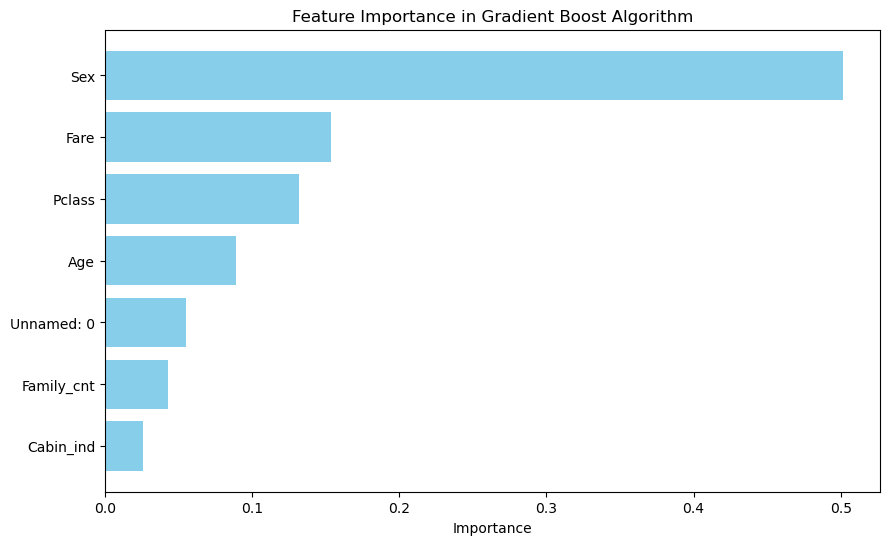

In [67]:
# Plot Feature importance

# Step 1: Get the best estimator
best_gb = cv.best_estimator_

# Step 2: Extract feature importances from the best model
feature_importances = best_gb.feature_importances_

# Step 3: Create a DataFrame for feature names and their corresponding importance
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Step 4: Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Step 5: Plot the feature importance
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Gradient Boost Algorithm')
plt.show()